# $$ \mathrm{Network-Analysis} $$

In [3]:
import sys
sys.path.append("/usr/lib/python2.7/dist-packages")

In [4]:
import numpy            as np
import graph_tool.all as gt
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
g = gt.load_graph("HIT.xml.gz")
pw = g.edge_properties["weight"]
Nnodes = g.num_vertices()
print "number of nodes ", g.num_vertices()
print "number of edges ", g.num_edges()

number of nodes  97980
number of edges  315333


# $$ ------------------------------- \\ \mathrm{Weight- Distribution} $$

In [9]:
weights = {}; values  = {}; hist    = {}; ccdf    = {}
g.set_vertex_filter(None)
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
for cen in ['out','in','total']:
    weights[cen] = np.sort(g.degree_property_map(cen, weight=pw).fa)
    values[cen] = np.unique(weights[cen])
    hist[cen] = [np.count_nonzero(weights[cen] == x) for x in values[cen]]
    ccdf[cen] = np.cumsum(hist[cen]).astype(float)
    ccdf[cen] *= 1./ccdf[cen][-1]
    ccdf[cen] = 1.-ccdf[cen]

27806


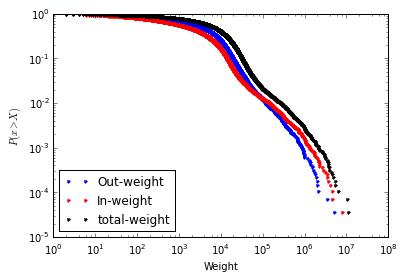

In [5]:
%matplotlib inline
plt.figure()
plt.xlabel('Weight')
plt.ylabel(r'$P(x>X)$')
color = {'out':'b.','in':'r.','total':'k.'}

print g.num_vertices()
for centrality in ['out','in','total']:
    plt.loglog(values[centrality][0:-1],ccdf[centrality][0:-1],color[centrality])
plt.legend(['Out-weight','In-weight', 'total-weight'],loc='lower left')

# $$ Degree - Distribution $$

In [13]:
degree = {}; values  = {}; hist    = {}; ccdf    = {}
g.set_vertex_filter(None)
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
for cen in ['out','in','total']:
    degree[cen] = np.sort(g.degree_property_map(cen).fa)
    values[cen] = np.unique(degree[cen])
    hist[cen] = [np.count_nonzero(degree[cen] == x) for x in values[cen]]
    ccdf[cen] = np.cumsum(hist[cen]).astype(float)
    ccdf[cen] *= 1./ccdf[cen][-1]
    ccdf[cen] = 1.-ccdf[cen]

27806


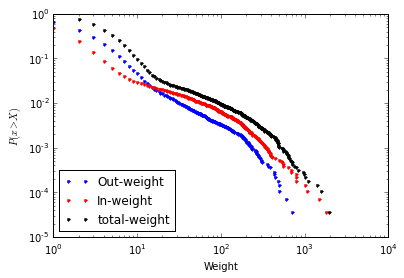

In [14]:
%matplotlib inline
plt.figure()
plt.xlabel('Weight')
plt.ylabel(r'$P(x>X)$')
color = {'out':'b.','in':'r.','total':'k.'}
print g.num_vertices()
for centrality in ['out','in','total']:
    plt.loglog(values[centrality][0:-1],ccdf[centrality][0:-1],color[centrality])
plt.legend(['Out-weight','In-weight', 'total-weight'],loc='lower left')

# $$ Correlation $$

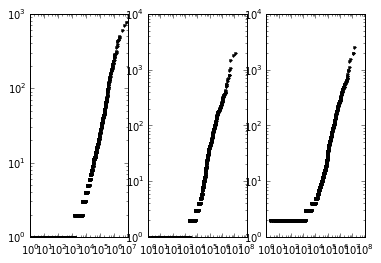

In [15]:
%matplotlib inline
plt.figure()
ax1 = plt.subplot(1,3,1)
ax1.loglog(weights['out'],degree['out'],'k.')

ax2 = plt.subplot(1,3,2)
ax2.loglog(weights['in'],degree['in'],'k.')

ax3 = plt.subplot(1,3,3)
ax3.loglog(weights['total'],degree['total'],'k.')

# $$ ------------------------------- \\ \mathrm{Vulnerability-Analysis} $$

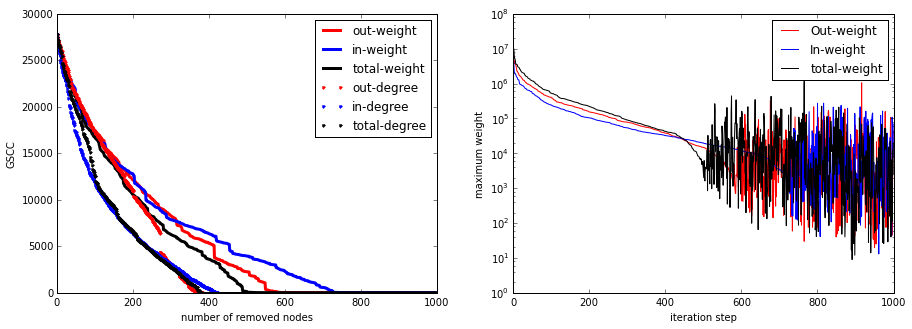

In [9]:
%matplotlib inline
result = np.load('node_centrality_filtered.npz')
size = result['size'].item()
max_degree = result['max_degree'].item()
N = len(size['in'])

color = {'out':'b-','in':'r-','total':'k-'}
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
for cen in ['in','out','total']:
    ax1.plot(range(N),size[cen],color[cen],linewidth=3)
ax1.set_ylabel('GSCC')
ax1.set_xlabel('number of removed nodes')

ax2 = plt.subplot(122)
for cen in ['in','out','total']:
    ax2.semilogy(range(N),max_degree[cen],color[cen])
ax2.set_xlabel('iteration step')
ax2.set_ylabel('maximum weight')
ax2.legend(['Out-weight','In-weight', 'total-weight'],loc="upper right")

result = np.load('node_centrality_unweighted.npz')
size = result['size'].item()
N = len(size['in'])

color = {'out':'b.','in':'r.','total':'k.'}
for cen in ['in','out','total']:
    ax1.plot(range(N),size[cen],color[cen])
ax1.legend(['out-weight','in-weight', 'total-weight','out-degree','in-degree', 'total-degree'],loc="upper right")

# $$ -------------------------------\\ Submit~a~job $$

In [24]:
from subprocess import Popen, PIPE, check_call
fname = "/home/andreasko/netzwerk_analyse/node_centrality_unweighted"
process = Popen("qsub -o %s -m e -mem 4 -speed 3 -numcpus 8 -env PYTHONPATH=%s -args '%s' job_node_centrality"
      %(fname, "$PYTHONPATH:.",fname), shell=True, stdout=PIPE, stderr=PIPE)
print process.stdout.read()
print process.stderr.read()

 ___________________________________________
/ ----------------------------------------- \
| | DIE Q INFORMIERT:                     | |
| | Condor under normal Operation   !     | |
| | Die Option speed option wurde geändert| |
\ ----------------------------------------- /
 -------------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||
This is qpy-condor wrapper for qsub.
send comments or bug-reports to root@itp.tu-berlin.de
Set memtype to 4
Set speed type to 3
Request 8 cores.
Add environmental variables 'PYTHONPATH=/usr/glocal/lib64/python2.7/site-packages:/usr/local/lib64/python2.7/site-packages:.' to executed job.
Pass Argument '/home/andreasko/netzwerk_analyse/node_centrality_unweighted' to submitted binary.
Workgroup agschoell detected!

Preparing submission file, please wait
Output file: /home/andreasko/netzwerk_analyse/node_centrality_unweighted
Job prepared with QCONDOR=1;P